<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/AIS_VesselType_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
path = '/gdrive/My Drive/'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import file
df = pd.read_csv(path + 'ais_data_version1.csv')

In [5]:
df.head()

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,0,367339240,2021-09-30T00:00:02,36.99416,-89.15366,0.3,350.0,328.0,SHERRYL B REEVES,NaN,WDE3451,31.0,12.0,48.0,12.0,NaN,57.0,A
1,1,316020871,2021-09-30T00:00:02,48.70558,-123.54449,0.0,61.4,109.0,SEASPAN EAGLE,IMO9432971,CFN6642,31.0,0.0,28.0,12.0,5.3,32.0,A
2,2,368033750,2021-09-30T00:00:02,38.96336,-76.48107,0.0,360.0,281.0,OCEANAIRE,IMO0000000,WDK2245,37.0,NaN,16.0,4.0,NaN,NaN,B
3,3,338329872,2021-09-30T00:00:04,41.63435,-71.21239,0.0,360.0,511.0,POR-SHA,IMO0000000,NaN,37.0,NaN,10.0,3.0,NaN,NaN,B
4,4,338400879,2021-09-30T00:00:04,42.37885,-87.80212,12.7,202.1,511.0,LADY B,IMO0000000,NaN,37.0,NaN,17.0,5.0,NaN,NaN,B


In [6]:
df.columns

Index(['Unnamed: 0', 'MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG',
       'Heading', 'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'TransceiverClass'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0'], axis = 1, inplace =True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9107856 entries, 0 to 9107855
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MMSI              int64  
 1   BaseDateTime      object 
 2   LAT               float64
 3   LON               float64
 4   SOG               float64
 5   COG               float64
 6   Heading           float64
 7   VesselName        object 
 8   IMO               object 
 9   CallSign          object 
 10  VesselType        float64
 11  Status            float64
 12  Length            float64
 13  Width             float64
 14  Draft             float64
 15  Cargo             float64
 16  TransceiverClass  object 
dtypes: float64(11), int64(1), object(5)
memory usage: 1.2+ GB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MMSI,9107856.0,3.676640e+08,5.561508e+07,1.111111e+08,3.668371e+08,3.674345e+08,3.677816e+08,1.000000e+09
LAT,9107856.0,3.555423e+01,7.140888e+00,4.406800e-01,2.976345e+01,3.397533e+01,4.074817e+01,5.578280e+01
LON,9107856.0,-9.344261e+01,2.030699e+01,-1.615699e+02,-9.704508e+01,-9.020192e+01,-8.014592e+01,1.458650e+02
SOG,9107856.0,2.476341e+00,6.382304e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.023000e+02
COG,9107856.0,2.145385e+02,1.127067e+02,0.000000e+00,1.250000e+02,2.334000e+02,3.110000e+02,3.813000e+02
Heading,9107856.0,3.659021e+02,1.775102e+02,0.000000e+00,2.100000e+02,5.110000e+02,5.110000e+02,5.110000e+02
VesselType,8943277.0,4.451370e+01,1.970612e+01,0.000000e+00,3.100000e+01,3.700000e+01,6.000000e+01,9.900000e+01
Status,6602842.0,4.230224e+00,5.665790e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.500000e+01
Length,8483983.0,5.066461e+01,6.997891e+01,0.000000e+00,1.700000e+01,2.300000e+01,4.100000e+01,5.260000e+02
Width,7460457.0,1.117047e+01,9.871543e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01,1.260000e+02


In [10]:
df.VesselType.value_counts()

31.0    3086844
37.0    1871217
60.0     672586
70.0     634942
30.0     632441
         ...   
25.0        213
1.0         174
86.0        168
98.0        124
3.0          83
Name: VesselType, Length: 66, dtype: int64

In [11]:
df.VesselType.unique()

array([31., 37., 36., 70., 60., 90., 30., nan, 72., 57., 65., 79., 99.,
       33., 80.,  0., 52., 89., 34., 40., 50., 35., 51., 49., 47., 18.,
       69., 32., 74., 71., 54., 53., 95., 58.,  8., 56., 10., 55., 91.,
       76., 81., 67., 59.,  6.,  9., 39., 20., 66.,  7., 38., 73., 97.,
       82., 84., 83., 87., 64., 25., 94., 75.,  1., 29., 98.,  3., 68.,
       86., 77.])

In [12]:
# variable to hold the count of VesselType
count = 0
# list to hold VesselType unique values
VesselType_values =[]
#loop to count unique VesselType values
for i in range(0, len(df['VesselType'])):
  if df['VesselType'][i] not in VesselType_values:
    VesselType_values.append(df['VesselType'][i])
    count+=1
print('No of unique VesselType values: ', count)
print('Vessel Type unique values: ',VesselType_values)

No of unique VesselType values:  164645
Vessel Type unique values:  [31.0, 37.0, 36.0, 70.0, 60.0, 90.0, 30.0, nan, 72.0, nan, 57.0, 65.0, 79.0, 99.0, 33.0, 80.0, nan, 0.0, 52.0, nan, 89.0, nan, 34.0, 40.0, 50.0, nan, 35.0, 51.0, nan, nan, 49.0, 47.0, 18.0, nan, nan, 69.0, nan, nan, nan, 32.0, nan, 74.0, nan, nan, nan, 71.0, nan, nan, nan, 54.0, nan, nan, nan, nan, nan, 53.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 95.0, 58.0, nan, nan, nan, 8.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 56.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 10.0, nan, 55.0, nan, nan, nan, 91.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 76.0, nan, nan, 81.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 67.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 59.0, nan, nan, 6.0, nan, nan, nan, nan, nan, 9.0, 39.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 20.0, 66.0, nan, 7.0

In [13]:
df.dropna()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
1,316020871,2021-09-30T00:00:02,48.70558,-123.54449,0.0,61.4,109.0,SEASPAN EAGLE,IMO9432971,CFN6642,31.0,0.0,28.0,12.0,5.3,32.0,A
19,371718000,2021-09-30T00:00:00,49.29824,-123.07688,7.7,274.0,274.0,SOLAR MAJESTY,IMO9881495,3FID9,70.0,0.0,292.0,45.0,10.1,70.0,A
21,636017994,2021-09-30T00:00:01,34.31485,-75.89499,8.2,223.9,224.0,TRF PARTICI,IMO9419785,A8UF9,70.0,0.0,230.0,32.0,12.0,70.0,A
22,367394940,2021-09-30T00:00:00,27.94339,-82.44221,0.0,64.4,187.0,ESCAMBIA,IMO9190951,WDE7575,31.0,0.0,27.0,15.0,1.6,31.0,A
29,316026694,2021-09-30T00:00:04,44.33950,-82.75404,11.7,341.7,341.0,CSL ST-LAURENT,IMO9665281,CFK5152,70.0,0.0,225.0,23.0,9.0,70.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107704,566915000,2021-09-30T07:49:56,14.26174,142.74272,13.3,240.7,244.0,MTM MANILA,IMO9242326,9V2086,80.0,0.0,183.0,32.0,11.9,80.0,A
9107705,566915000,2021-09-30T08:00:25,14.24324,142.70769,13.2,243.1,244.0,MTM MANILA,IMO9242326,9V2086,80.0,0.0,183.0,32.0,11.9,80.0,A
9107706,566915000,2021-09-30T08:30:46,14.19089,142.60517,13.3,242.6,244.0,MTM MANILA,IMO9242326,9V2086,80.0,0.0,183.0,32.0,11.9,80.0,A
9107707,566915000,2021-09-30T09:18:45,14.10683,142.44229,13.5,238.4,243.0,MTM MANILA,IMO9242326,9V2086,80.0,0.0,183.0,32.0,11.9,80.0,A


In [14]:
vessel_type_0=(df['VesselType']==0).sum()

In [15]:
vessel_type_0

91972

In [16]:
df[df['VesselType']==0].groupby('MMSI').size().reset_index()

,MMSI,0
0,210000000,1172
1,211002010,739
2,230682000,1180
3,303250000,272
4,316001002,1240
...,...,...
129,585921080,884
130,636020277,455
131,669970719,453
132,671297100,476


In [17]:
invalid_entries=[0]
invalid = df[df.VesselType.isin(invalid_entries)]
invalid

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
111,368134480,2021-09-30T00:00:01,36.60510,-121.89227,0.2,122.1,511.0,PRINCESS MONTEREY,IMO8967632,WDL4752,0.0,15.0,27.0,8.0,0.0,0.0,A
139,669970719,2021-09-30T00:00:08,36.67008,-74.18923,7.9,3.1,511.0,US GOV VESSEL-24----,NaN,NARL---,0.0,0.0,208.0,64.0,0.0,0.0,A
234,368134280,2021-09-30T00:00:09,41.67163,-88.02666,4.6,124.3,511.0,ELYSE NOELLE,NaN,WDL4732,0.0,0.0,8.0,8.0,1.0,0.0,A
274,367413760,2021-09-30T00:00:01,47.60934,-122.34637,0.0,0.2,511.0,BAY LADY,NaN,WCZ3958,0.0,8.0,0.0,0.0,0.0,99.0,A
282,368149190,2021-09-30T00:00:03,41.41792,-71.19561,6.5,130.8,511.0,CAMDYN,IMO8993760,WDL6282,0.0,0.0,0.0,0.0,3.8,52.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107641,368926271,2021-09-30T02:40:44,13.65210,144.49201,16.6,291.0,291.0,WARSHIP 18,NaN,NaN,0.0,0.0,121.0,32.0,0.0,35.0,A
9107642,368926271,2021-09-30T02:41:47,13.65377,144.48741,16.6,289.0,291.0,WARSHIP 18,NaN,NaN,0.0,0.0,121.0,32.0,0.0,35.0,A
9107643,368926271,2021-09-30T02:47:02,13.66204,144.46487,16.0,290.3,291.0,WARSHIP 18,NaN,NaN,0.0,0.0,121.0,32.0,0.0,35.0,A
9107644,368926271,2021-09-30T02:48:03,13.66367,144.46041,16.0,291.7,291.0,WARSHIP 18,NaN,NaN,0.0,0.0,121.0,32.0,0.0,35.0,A


In [18]:
df.dropna(subset=['VesselType'])

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,367339240,2021-09-30T00:00:02,36.99416,-89.15366,0.3,350.0,328.0,SHERRYL B REEVES,NaN,WDE3451,31.0,12.0,48.0,12.0,NaN,57.0,A
1,316020871,2021-09-30T00:00:02,48.70558,-123.54449,0.0,61.4,109.0,SEASPAN EAGLE,IMO9432971,CFN6642,31.0,0.0,28.0,12.0,5.3,32.0,A
2,368033750,2021-09-30T00:00:02,38.96336,-76.48107,0.0,360.0,281.0,OCEANAIRE,IMO0000000,WDK2245,37.0,NaN,16.0,4.0,NaN,NaN,B
3,338329872,2021-09-30T00:00:04,41.63435,-71.21239,0.0,360.0,511.0,POR-SHA,IMO0000000,NaN,37.0,NaN,10.0,3.0,NaN,NaN,B
4,338400879,2021-09-30T00:00:04,42.37885,-87.80212,12.7,202.1,511.0,LADY B,IMO0000000,NaN,37.0,NaN,17.0,5.0,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107832,338926439,2021-09-30T22:50:57,13.42388,144.66368,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,90.0,0.0,44.0,8.0,0.0,90.0,A
9107833,338926439,2021-09-30T22:59:07,13.42386,144.66368,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,90.0,0.0,44.0,8.0,0.0,90.0,A
9107834,338926439,2021-09-30T23:29:57,13.42385,144.66368,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,90.0,0.0,44.0,8.0,0.0,90.0,A
9107835,338926439,2021-09-30T23:46:26,13.42386,144.66367,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,90.0,0.0,44.0,8.0,0.0,90.0,A


In [19]:
df.VesselType.isna().sum()

164579

In [20]:
df.dropna(subset = ["VesselType"], inplace=True)

In [21]:
df.shape

(8943277, 17)

In [22]:
df.isna().sum()

MMSI                      0
BaseDateTime              0
LAT                       0
LON                       0
SOG                       0
COG                       0
Heading                   0
VesselName            23295
IMO                 4322276
CallSign            1144301
VesselType                0
Status              2474417
Length               515395
Width               1513966
Draft               5891587
Cargo               2467639
TransceiverClass          0
dtype: int64

In [23]:
df.VesselType.unique()

array([31., 37., 36., 70., 60., 90., 30., 72., 57., 65., 79., 99., 33.,
       80.,  0., 52., 89., 34., 40., 50., 35., 51., 49., 47., 18., 69.,
       32., 74., 71., 54., 53., 95., 58.,  8., 56., 10., 55., 91., 76.,
       81., 67., 59.,  6.,  9., 39., 20., 66.,  7., 38., 73., 97., 82.,
       84., 83., 87., 64., 25., 94., 75.,  1., 29., 98.,  3., 68., 86.,
       77.])

In [24]:
df['VesselType'] = df['VesselType'].apply(np.int64)

In [25]:
display(df.dtypes)

MMSI                  int64
BaseDateTime         object
LAT                 float64
LON                 float64
SOG                 float64
COG                 float64
Heading             float64
VesselName           object
IMO                  object
CallSign             object
VesselType            int64
Status              float64
Length              float64
Width               float64
Draft               float64
Cargo               float64
TransceiverClass     object
dtype: object

In [26]:
df["VesselType"].replace({0: "Not Available", 30: "Fishing", 35:"Military", 
                          (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,23,24,25,26,27,28,29,33,34, 
                           38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59, 90,
                           91,92,93,94,95,96,97,98,99):'Other',
                          (60,61,62,63,64,65,66,67,68,69):'Passenger',
                          (70,71,72,73,74,75,76,77,78,79):'Cargo',
                          (36,37):'Pleasure Craft/Sailing',
                          (80,81,82,83,84,85,86,87,88,89):'Tanker',
                          (21,22,31,32,52):'Tug Tow'}, inplace=True)

In [27]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,367339240,2021-09-30T00:00:02,36.99416,-89.15366,0.3,350.0,328.0,SHERRYL B REEVES,NaN,WDE3451,Tug Tow,12.0,48.0,12.0,NaN,57.0,A
1,316020871,2021-09-30T00:00:02,48.70558,-123.54449,0.0,61.4,109.0,SEASPAN EAGLE,IMO9432971,CFN6642,Tug Tow,0.0,28.0,12.0,5.3,32.0,A
2,368033750,2021-09-30T00:00:02,38.96336,-76.48107,0.0,360.0,281.0,OCEANAIRE,IMO0000000,WDK2245,Pleasure Craft/Sailing,NaN,16.0,4.0,NaN,NaN,B
3,338329872,2021-09-30T00:00:04,41.63435,-71.21239,0.0,360.0,511.0,POR-SHA,IMO0000000,NaN,Pleasure Craft/Sailing,NaN,10.0,3.0,NaN,NaN,B
4,338400879,2021-09-30T00:00:04,42.37885,-87.80212,12.7,202.1,511.0,LADY B,IMO0000000,NaN,Pleasure Craft/Sailing,NaN,17.0,5.0,NaN,NaN,B


In [28]:
df['VesselType'].value_counts()

Tug Tow                   3312263
Pleasure Craft/Sailing    2245048
Other                      952380
Cargo                      704583
Passenger                  694996
Fishing                    632441
Tanker                     298945
Not Available               91972
Military                    10649
Name: VesselType, dtype: int64

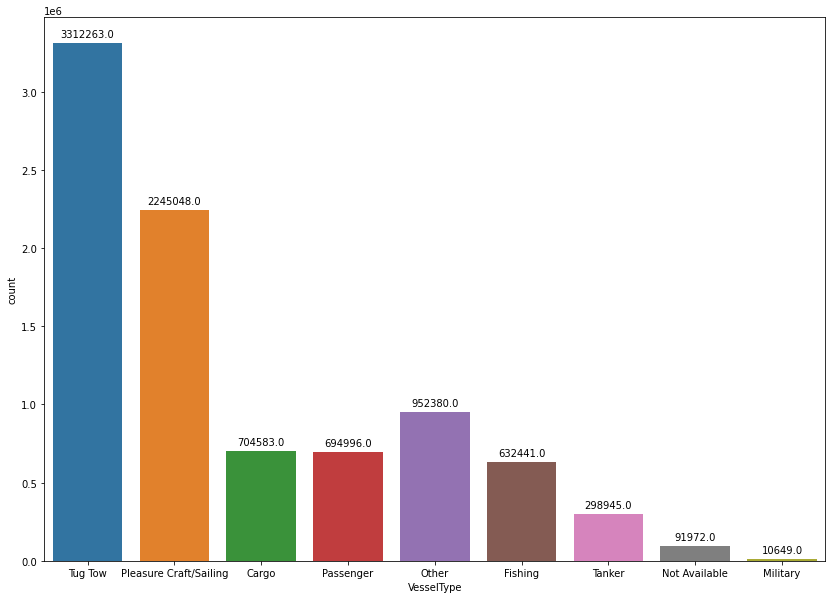

In [29]:
plt.figure(figsize=(14, 10))
ax= sns.countplot(x='VesselType', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')